# 2022-11-16

$$f(x) = mx + b$$

$$ \text{MSE} = \frac{1}{n} \sum^{n}_{i=0}(y_{i} - (mx_{i} + b))^2$$ 

$$\frac{\partial \text{MSE}}{\partial m} = \frac{1}{n} \sum^{n}_{i=0} 2 (y_{i} - (mx_{i} + b)) * (-x_{i}) = - \frac{2}{n} \sum^{n}_{i=0} x_{i}(y_{i} - (mx_{i} + b))$$

$$\frac{\partial \text{MSE}}{\partial b} = - \frac{2}{n} \sum^{n}_{i=0}(y_{i} - (mx_{i} + b))$$

$$m =m - L \frac{\partial \text{MSE}}{\partial m}$$
$$b = b - L \frac{\partial \text{MSE}}{\partial b}$$

In [3]:
import matplotlib.pyplot as plt
from typing import List, Tuple, Callable
import numpy as np
import random

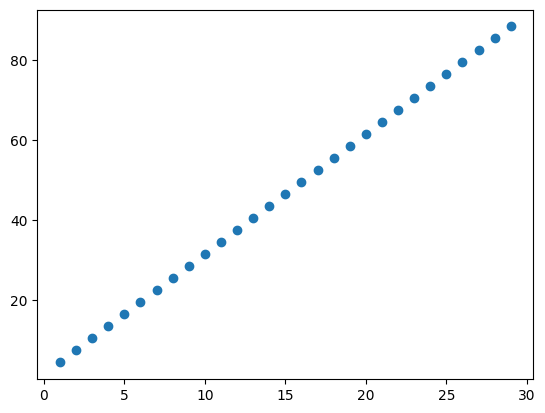

In [13]:
m = 3.
b = 1.5

def f(x: float, m: float, b: float) -> float:
    return x * m + b

def f_noisy(x: float, m: float, b: float, k: float = 1) -> float:
    return x * m + b + k * random.uniform(-1, 1)

x = np.arange(1, 30)
y = np.array([f(xi, m, b) for xi in x])

plt.scatter(x, y)

In [8]:
def mse(y: np.ndarray, y_f: np.ndarray) -> float:
    return 1 / y.size * np.sum((y - y_f)**2)

def optim(x: np.ndarray, y: np.ndarray, lr: float = 1e-3, epochs: int = 1000) -> Tuple[float, float]:
    m = random.uniform(-1, 1)
    b = random.uniform(-1, 1)
    for i in range(0, epochs):
        y_f = np.array([f(xi, m, b) for xi in x])
        d_m = - 2 / x.size * np.sum(x * (y-y_f))
        d_b = -2 / x.size * np.sum(y - y_f)

        m -= lr * d_m
        b -= lr * d_b

        if i % 100 == 0:
            print(f"Epoch {i} MSE: {mse(y, np.array([f(xi, m, b) for xi in x]))}")
        
    return m, b


Epoch 0 MSE: 341.1829566650612
Epoch 100 MSE: 0.5180245353589746
Epoch 200 MSE: 0.4712222741711159
Epoch 300 MSE: 0.42864848384280324
Epoch 400 MSE: 0.38992113228079756
Epoch 500 MSE: 0.35469270306551803
Epoch 600 MSE: 0.3226470770435815
Epoch 700 MSE: 0.29349669566091413
Epoch 800 MSE: 0.26697998058181394
Epoch 900 MSE: 0.24285898643921025
Epoch 1000 MSE: 0.22091726565320502
Epoch 1100 MSE: 0.200957926158127
Epoch 1200 MSE: 0.18280186460921488
Epoch 1300 MSE: 0.1662861592147981
Epoch 1400 MSE: 0.1512626077721936
Epoch 1500 MSE: 0.13759639778852056
Epoch 1600 MSE: 0.12516489675286954
Epoch 1700 MSE: 0.11385655170446411
Epoch 1800 MSE: 0.10356988822214704
Epoch 1900 MSE: 0.09421259985276201
Epoch 2000 MSE: 0.08570071980746571
Epoch 2100 MSE: 0.07795786749326444
Epoch 2200 MSE: 0.07091456311861737
Epoch 2300 MSE: 0.0645076042227409
Epoch 2400 MSE: 0.058679498533994484
Epoch 2500 MSE: 0.05337794806813171
Epoch 2600 MSE: 0.04855537983702376
Epoch 2700 MSE: 0.04416851895671095
Epoch 2800 MS

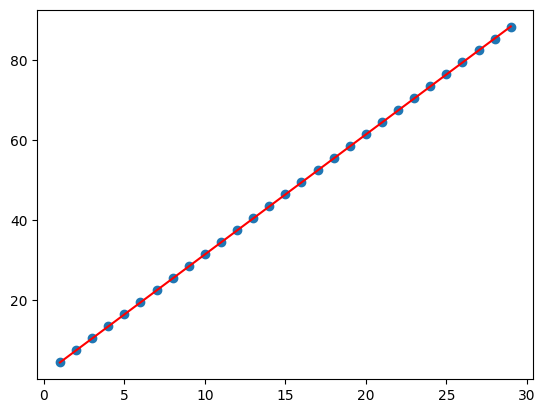

In [11]:
new_b, new_m = optim(x, y, epochs=10000)
y_f = np.array([f(xi, new_b, new_m) for xi in x])
print(new_b, new_m)
plt.scatter(x, y)
plt.plot(x, y_f, 'r')

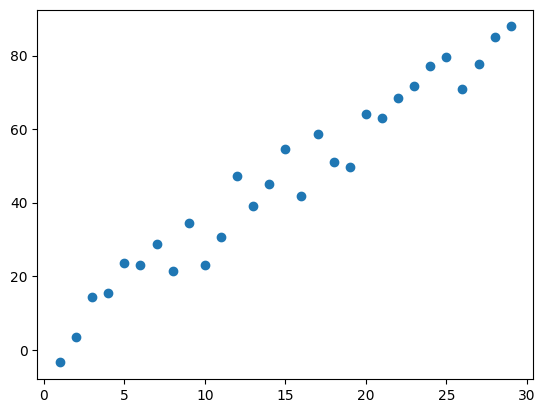

In [15]:
x = np.arange(1, 30)
y = np.array([f_noisy(xi, m, b, 10) for xi in x])

plt.scatter(x, y)

Epoch 0 MSE: 495.03374255859626
Epoch 100 MSE: 28.729614106859575
Epoch 200 MSE: 28.678934210072804
Epoch 300 MSE: 28.632833119123386
Epoch 400 MSE: 28.590897150001954
Epoch 500 MSE: 28.552749994046735
Epoch 600 MSE: 28.518049341171444
Epoch 700 MSE: 28.48648380817638
Epoch 800 MSE: 28.457770144579282
Epoch 900 MSE: 28.431650690892315
Epoch 1000 MSE: 28.407891066537942
Epoch 1100 MSE: 28.386278066655684
Epoch 1200 MSE: 28.366617748927464
Epoch 1300 MSE: 28.348733693253532
Epoch 1400 MSE: 28.33246541866258
Epoch 1500 MSE: 28.317666943250053
Epoch 1600 MSE: 28.304205474222684
Epoch 1700 MSE: 28.291960216294193
Epoch 1800 MSE: 28.280821287739624
Epoch 1900 MSE: 28.270688734381554
Epoch 2000 MSE: 28.26147163266022
Epoch 2100 MSE: 28.25308727373909
Epoch 2200 MSE: 28.2454604213246
Epoch 2300 MSE: 28.238522636539866
Epoch 2400 MSE: 28.232211663794725
Epoch 2500 MSE: 28.22647087214063
Epoch 2600 MSE: 28.221248747098016
Epoch 2700 MSE: 28.216498428395685
Epoch 2800 MSE: 28.212177289474344
Epoc

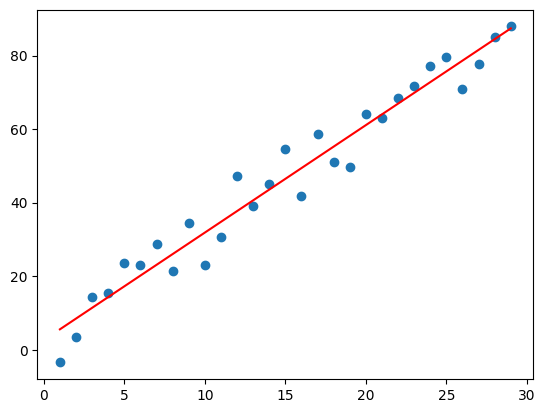

In [16]:
new_b, new_m = optim(x, y, epochs=10000)
y_f = np.array([f(xi, new_b, new_m) for xi in x])
print(new_b, new_m)
plt.scatter(x, y)
plt.plot(x, y_f, 'r')

$$f(x_{j_{1}}, \dotsc , x_{j_{k}}) = w_{j_{1}}x_{j_{1}} + \dotsc + w_{j_{k}}x_{j_{k}} + b$$

$$ \text{MSE} = \frac{1}{n} \sum^{n}_{i=0}(y_{i} - (w_{j_{1}}x_{j_{1}i} + \dotsc + w_{j_{k}}x_{j_{k}i} + b))^2$$ 

$$\frac{\partial \text{MSE}}{\partial w_{j}} = - \frac{2}{n} \sum^{n}_{i=0} x_{j}(y_{i} - (w_{j_{1}}x_{i} + + \dotsc + w_{j_{k}}x_{j_{k}i} + b))$$

$$\frac{\partial \text{MSE}}{\partial b} = - \frac{2}{n} \sum^{n}_{i=0}(y_{i} - (w_{j_{1}}x_{i} + + \dotsc + w_{j_{k}}x_{j_{k}i} + b)$$

$$w_{j_{1}, \dotsc , j_{k}} = w_{j_{1}, \dotsc , j_{k}} - L \frac{\partial \text{MSE}}{\partial w_{j_{1}}, \dotsc , w_{j_{k}}}$$
$$b = b - L \frac{\partial \text{MSE}}{\partial b}$$

In [34]:
w = np.array([1., 1.5])
b = 1.5

def f(x: np.array, weights: np.array, bias: float) -> np.array:
    return np.dot(x, weights) + bias

def f_noise(x: np.array, weights: np.array, bias: float, k: float = 1) -> np.array:
    res = np.dot(x, weights) + bias 
    for i in res[0]:
        i *= k * random.uniform(-1, 1)

In [90]:
class LinearRegressionBetter:
    def __init__(self) -> None:
        self._weights: np.ndarray = None
        self._bias: float = None

    def fit(self, x: np.ndarray, y: np.ndarray, lr: float = 1e-3, epochs: int = 10000) -> None:
        self._weights = np.random.randn(x.shape[1])
        self._bias = random.uniform(-1, 1)

        for i in range(0, epochs):
            y_f = x.dot(self._weights) + self._bias

            d_w = -2 / x.size * np.dot(x.T, (y - y_f))
            d_b = - 2 / x.size * np.sum(y - y_f)

            self._weights -= lr * d_w
            self._bias -= lr * d_b

    def predict(self, x: np.ndarray) -> np.ndarray:
        return np.dot(x, self._weights) + self._bias

In [75]:
lr = LinearRegressionBetter()
lr.fit(x, y)

print(lr._weights, lr._bias)

/var/folders/3t/wmv3mchd6w99pw9syrlwn5kh0000gq/T/ipykernel_72932/4158894392.py:16: RuntimeWarning: invalid value encountered in subtract
  self._weights -= lr * d_w


KeyboardInterrupt: 

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [53]:
df = pd.read_csv("./data/Car details v3.csv")

df.head()

x = df[["year", "km_driven"]].values
y = df["selling_price"].values

In [66]:
year = df.sort_values("year")["year"].values
price = df.sort_values("year")["selling_price"].values

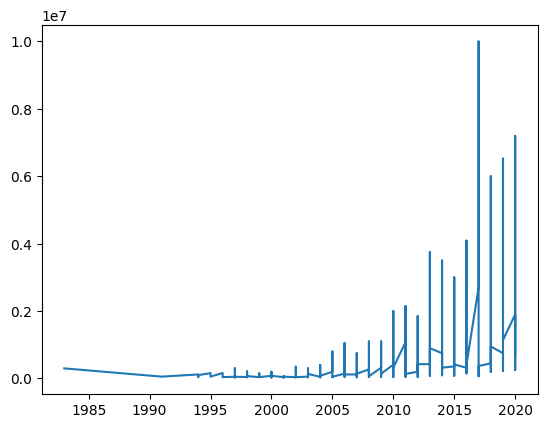

In [68]:
plt.plot(year, price)

In [70]:
km_driven = df.sort_values("km_driven")["km_driven"].values
price = df.sort_values("km_driven")["selling_price"].values

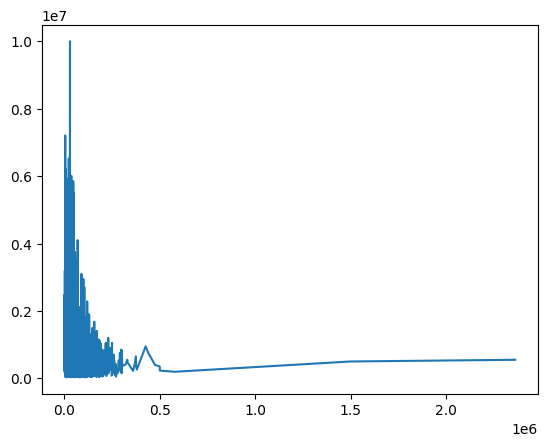

In [71]:
plt.plot(km_driven, price)

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [91]:
lrb = LinearRegressionBetter()
lr = LinearRegression()

In [92]:
lr.fit(x_train, y_train)

LinearRegression()

In [99]:
lrb.fit(x_train, y_train, epochs=1000, lr=1e-6)

/var/folders/3t/wmv3mchd6w99pw9syrlwn5kh0000gq/T/ipykernel_72932/770529707.py:16: RuntimeWarning: invalid value encountered in subtract
  self._weights -= lr * d_w


In [100]:
lrb._weights

array([nan, nan])

In [88]:
print(mean_absolute_error(y_test, lr.predict(x_test)))
print(mean_squared_error(y_test, lr.predict(x_test)))

392771.3143315716
533490526934.34644


In [97]:
print(mean_absolute_error(y_test, lrb.predict(x_test)))
print(mean_squared_error(y_test, lrb.predict(x_test)))

ValueError: Input contains NaN.